# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [357]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [358]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)

(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [359]:
# select numeric columns
df_numeric = df.select_dtypes(include=['number']).columns
print('\n', numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=['number']).columns
print('\n', non_numeric_cols)


 ['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']

 ['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


In [360]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            19676 non-null  object
 1   Review Text      22641 non-null  object
 2   Division Name    23472 non-null  object
 3   Department Name  23472 non-null  object
 4   Class Name       23472 non-null  object
dtypes: object(5)
memory usage: 917.5+ KB


In [361]:
num_missing = df.isna().sum()
num_missing[:10]

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
dtype: int64

In [362]:
pct_missing = df.isna().mean()
pct_missing[:10]

Unnamed: 0                 0.000000
Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
dtype: float64

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

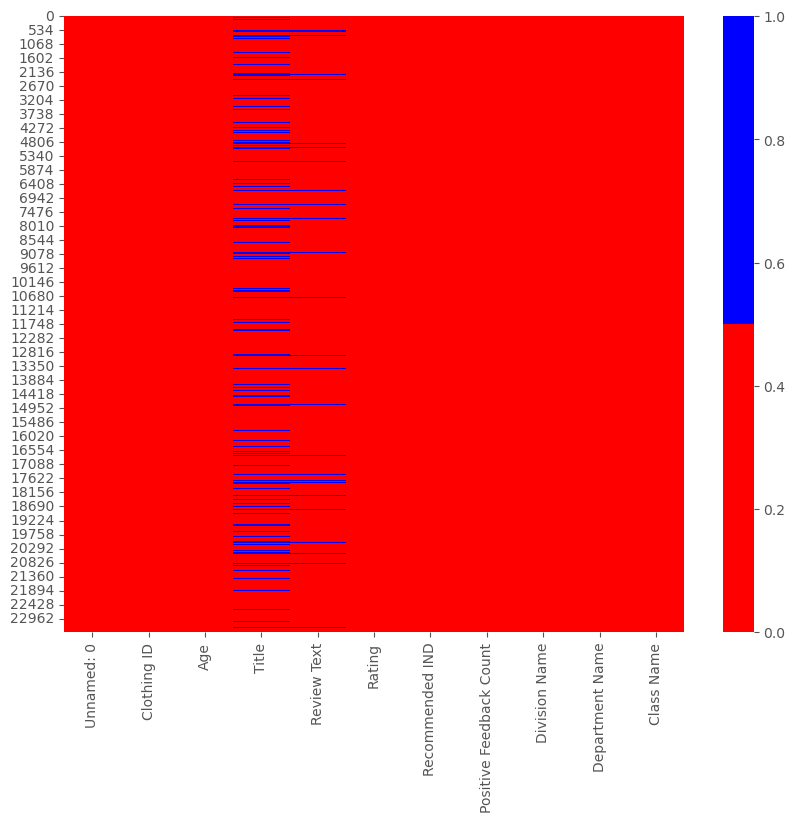

In [363]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))
cols = df.columns
colours = ['red', 'blue'] # specify colours: blue - missing. red - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [364]:
# Try out a missing data percentage list! 
#% of missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


<AxesSubplot:>

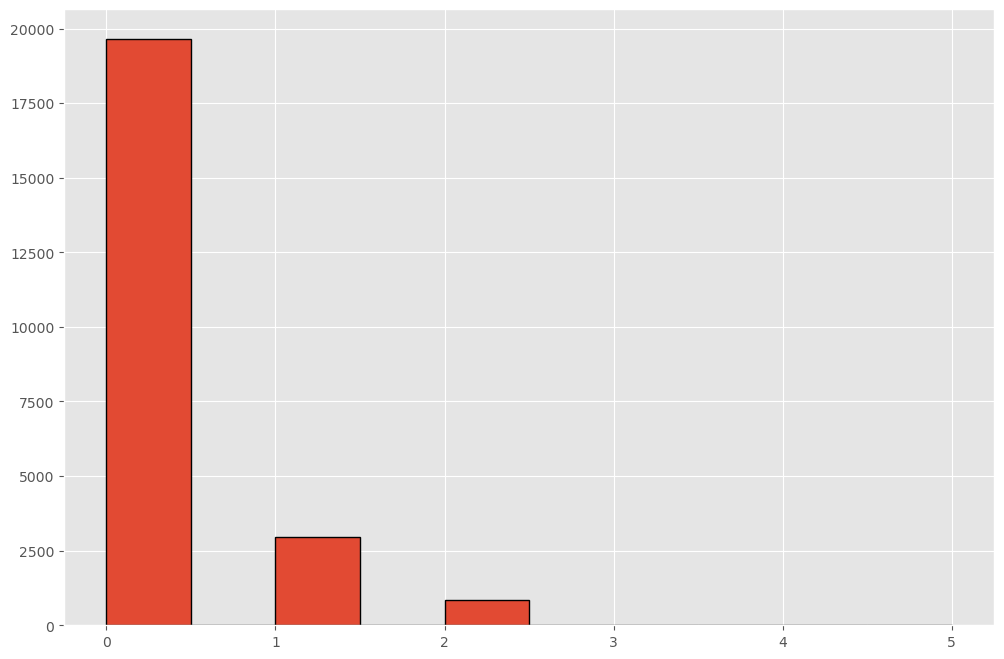

In [365]:
# Plot a missing data histogram

missing_by_rows = df.isnull().sum(axis='columns')
missing_by_rows.hist(bins=10, edgecolor='k', linewidth = 1)

In [366]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [368]:
# Handle any missing data in your dataframe.
# impute the missing values and create the missing value indicator variables for each numeric column.

df_categorical = df.select_dtypes(include=['object'])
categorical_cols = df_categorical.columns.values

for col in categorical_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        mode = df[col].mode().values[0]
        df[col] = df[col].fillna(mode)
# pct_missing[pct_missing > .1] # Title column is 10% missing values.
# drop_missing_df = df.drop(columns = pct_missing[pct_missing > .1].index)
# drop_missing_df

imputing missing values for: Title
imputing missing values for: Review Text
imputing missing values for: Division Name
imputing missing values for: Department Name
imputing missing values for: Class Name


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [370]:
#Finding Outliers
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


<AxesSubplot:>

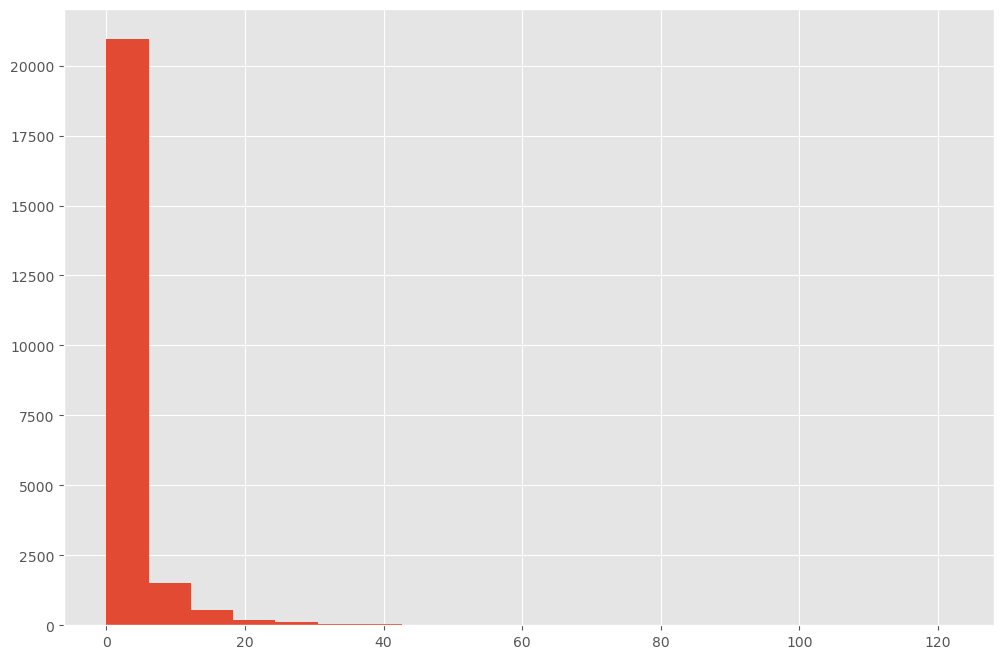

In [369]:
# Plot a histogram to see if there are any outliers.
df['Positive Feedback Count'].hist(bins=20)

<AxesSubplot:>

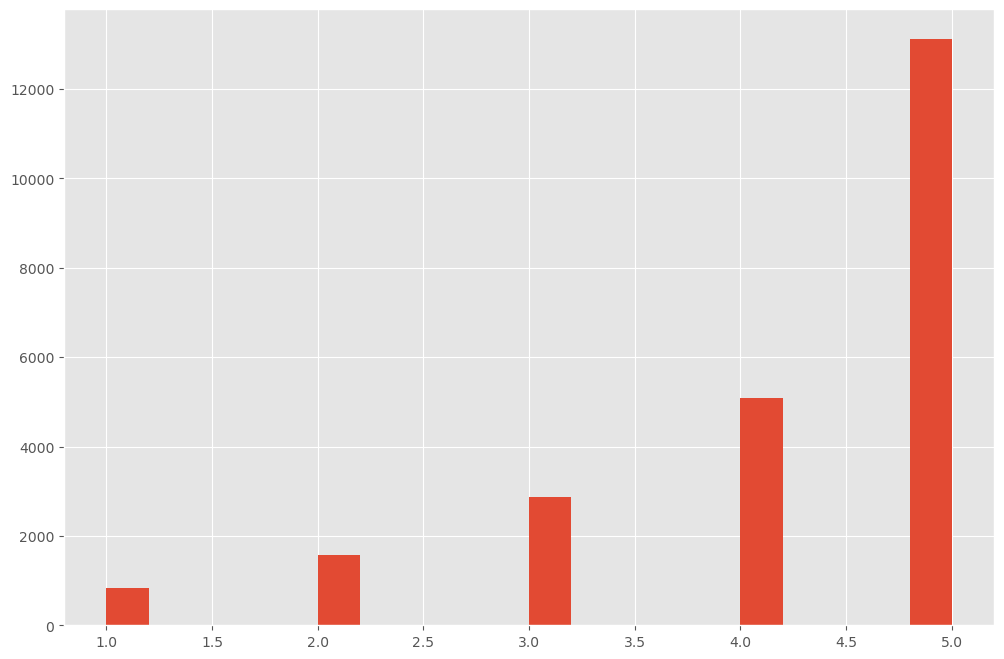

In [371]:
df['Rating'].hist(bins=20)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Clothing ID'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'Recommended IND'}>,
        <AxesSubplot:title={'center':'Positive Feedback Count'}>]],
      dtype=object)

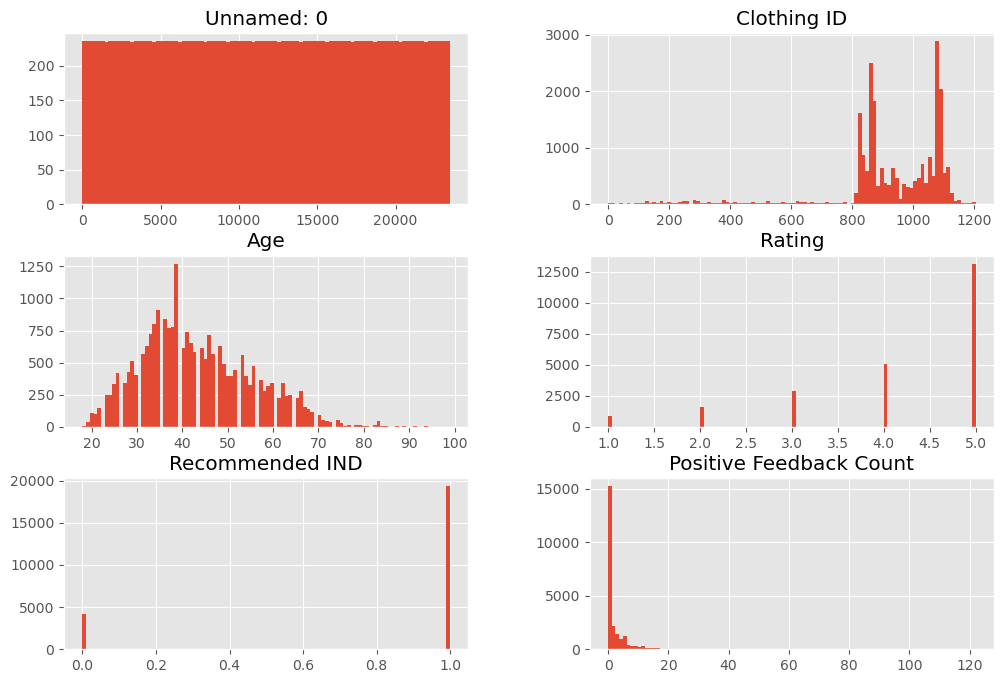

In [372]:
df.hist(bins = 100)

<AxesSubplot:>

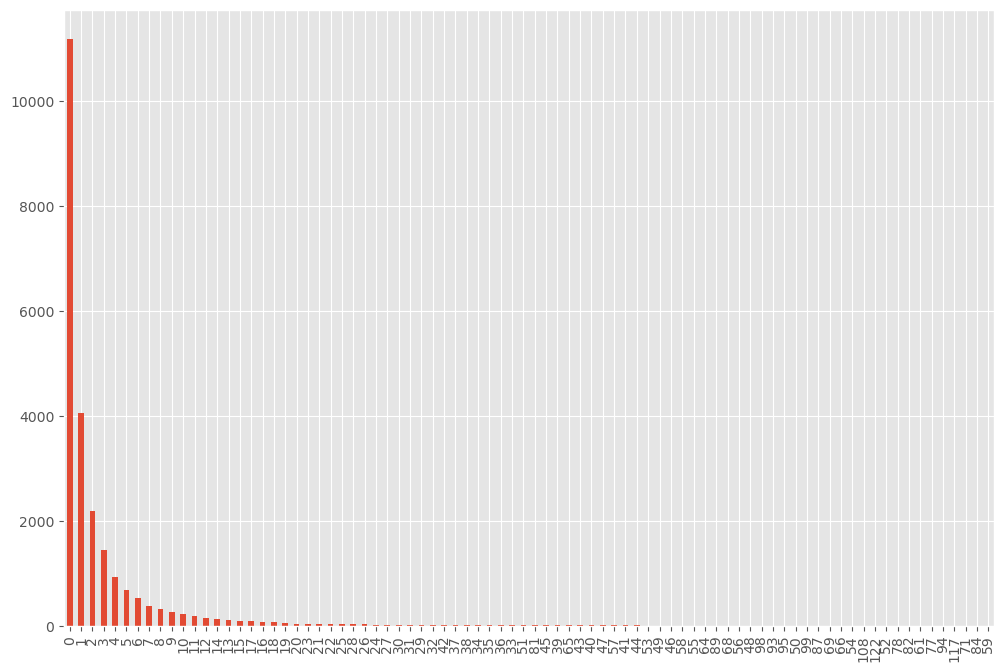

In [373]:
# Plot a bar chart
# bar chart -  distribution of a categorical variable
df['Positive Feedback Count'].value_counts().plot.bar()

<AxesSubplot:>

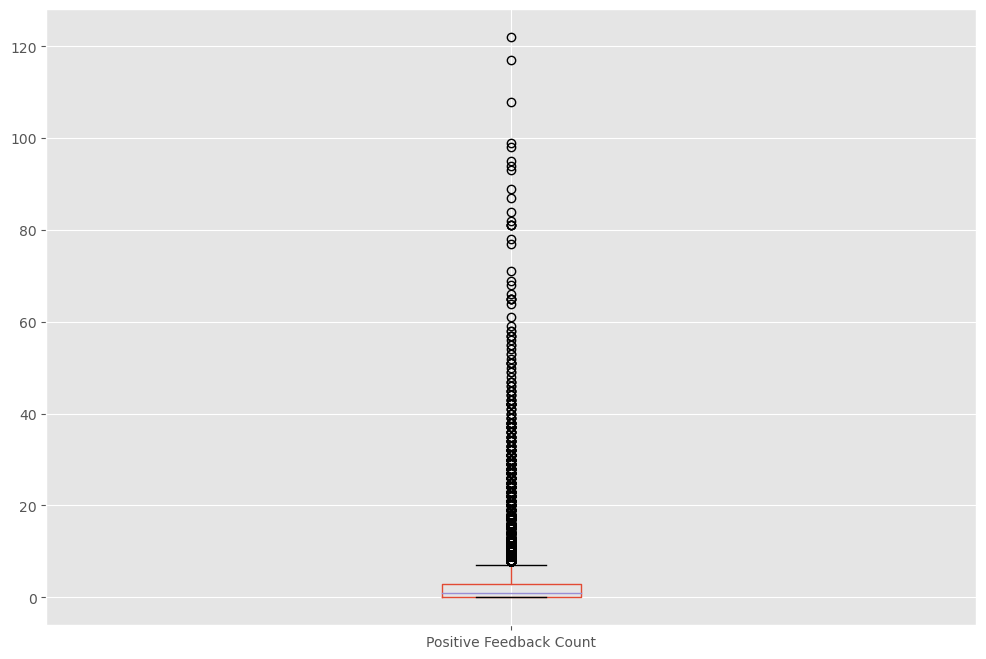

In [375]:
# box plot.
df.boxplot(column=['Positive Feedback Count'])

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?
Histogram & barchart

In [377]:
# Handle any outliers in your dataframe
# I think Positive Feedback Count is the outliers, The Bar chart &
# Histogram helped me to find out the outliers.
# I would like to keep the column because there are lot of customers
# gave 0 feedback, we should focus in which area we need to remodel the 
# design for improvising in the business, 70%-75% gave Positive feedback count, 
# only 20%-25% gave that feedback 122 which will not affect the data set.


## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [380]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
print('{0}: {1:.5f}%'.format(col, top_pct*100))
print(cnts)
print()

Class Name_ismissing: 99.94039%
False    23472
True        14
Name: Class Name_ismissing, dtype: int64



In [381]:
# Look for duplicates. How will you handle any duplicates?

key = ['Clothing ID', 'Age', 'Review Text', 'Rating', 'Positive Feedback Count', 'Recommended IND', 'Division Name', 'Class Name']

df.fillna(-999).groupby(key)['Clothing ID'].count().sort_values(ascending=False).head(30)
# There are 30 duplicates based on this set of key features.
num_duplicates = (df.duplicated()).sum()
print("Number of duplicate rows: ", num_duplicates)

Number of duplicate rows:  0


In [382]:
# drop duplicates based on an subset of variables.

key = ['Clothing ID', 'Age', 'Review Text', 'Rating', 'Positive Feedback Count', 'Recommended IND', 'Division Name', 'Class Name']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)
num_duplicates = (df.duplicated()).sum()
print("Number of duplicate rows: ", num_duplicates)
df.columns

(23486, 16)
(23465, 16)
Number of duplicate rows:  0


Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing'],
      dtype='object')

In [383]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# Title & Department Name  has a uninformative datas.
# If we want to drop.
cols_to_drop = ['Title', 'Department Name']
df_Title = df.drop(cols_to_drop, axis=1)
#df_Review_Text = df.drop(cols_to_drop, axis=1)
df_Department_Name = df.drop(cols_to_drop, axis=1)
print(df_Title, df_Review_Text, df_Department_Name)

       Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ..

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [384]:
# Try to convert all the strings in a column to lower or upper case. 
df['Division Name'].value_counts(dropna=False)

General           13864
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [385]:
# make everything lower case.
df['Division_Name_lower'] = df['Division Name'].str.lower()
df['Division_Name_lower'].value_counts(dropna=False)

general           13864
general petite     8120
initmates          1502
Name: Division_Name_lower, dtype: int64

In [386]:
# Try to convert all the strings in a column to lower or upper case. 
df['Class Name'].value_counts(dropna=False)

Dresses           6333
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [387]:
# make everything lower case.
df['Class_Name_lower'] = df['Class Name'].str.lower()
df['Class_Name_lower'].value_counts(dropna=False)

dresses           6333
knits             4843
blouses           3097
sweaters          1428
pants             1388
jeans             1147
fine gauge        1100
skirts             945
jackets            704
lounge             691
swim               350
outerwear          328
shorts             317
sleep              228
legwear            165
intimates          154
layering           146
trend              119
casual bottoms       2
chemises             1
Name: Class_Name_lower, dtype: int64

In [388]:
# make everything lower case.
df['Review_Text_lower'] = df['Review Text'].str.lower()
df['Review_Text_lower'].value_counts(dropna=False)

perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                                        848
love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.                                                                                                                                                                                                                                                                                    